In [ ]:
import time
import datetime
import numpy as np
import yfinance as yf

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, coint

start_date = "2023-09-11"
end_date = "2024-09-11"

# List of tickers
nifty_100_tickers = [
    "ASIANPAINT.NS",
    "BAJAJHLDNG.NS",  # Bajaj Holdings & Investment Ltd
    "BERGEPAINT.NS",  # Berger Paints India Ltd
    "BRITANNIA.NS",
    "CIPLA.NS",
    "COLPAL.NS",  # Colgate-Palmolive (India) Ltd
    "EICHERMOT.NS",
    "NESTLEIND.NS",
    "AMBUJACEM.NS",  # Ambuja Cements Ltd
    "GRASIM.NS",
    "HEROMOTOCO.NS",
    "ABB.NS",  # ABB India Ltd
    "HINDALCO.NS",
    "HINDUNILVR.NS",
    "ITC.NS",
    "TRENT.NS",  # Trent Ltd
    "LT.NS",
    "M&M.NS",
    "BOSCHLTD.NS",  # Bosch Ltd
    "RELIANCE.NS",
    "VEDL.NS",  # Vedanta Ltd
    "SHREECEM.NS",  # Shree Cement Ltd
    "SRF.NS",  # SRF Ltd
    "SIEMENS.NS",
    "TATAPOWER.NS",  # Tata Power Company Ltd
    "TATACONSUM.NS",
    "TATAMOTORS.NS",
    "TATASTEEL.NS",
    "WIPRO.NS",
    "APOLLOHOSP.NS",
    "DRREDDY.NS",
    "TITAN.NS",
    "SBIN.NS",  # State Bank of India
    "SHRIRAMFIN.NS",  # Shriram Finance Ltd
    "CHOLAFIN.NS",  # Cholamandalam Investment & Finance Company Ltd
    "BPCL.NS",  # Bharat Petroleum Corporation Ltd
    "BEL.NS",  # Bharat Electronics Ltd
    "KOTAKBANK.NS",
    "INFY.NS",  # Infosys Ltd
    "MSUMI.NS",  # Samvardhana Motherson International Ltd
    "PIDILITIND.NS",  # Pidilite Industries Ltd
    "HAVELLS.NS",  # Havells India Ltd
    "DABUR.NS",  # Dabur India Ltd
    "TORNTPHARM.NS",  # Torrent Pharmaceuticals Ltd
    "BAJFINANCE.NS",
    "ADANIENT.NS",  # Adani Enterprises Ltd
    "SUNPHARMA.NS",  # Sun Pharmaceuticals Industries Ltd
    "JSWSTEEL.NS",
    "HDFCBANK.NS",
    "TCS.NS",  # Tata Consultancy Services Ltd
    "ICICIBANK.NS",
    "POWERGRID.NS",  # Power Grid Corporation of India Ltd
    "BANKBARODA.NS",  # Bank of Baroda
    "CANBK.NS",  # Canara Bank
    "MARUTI.NS",  # Maruti Suzuki India Ltd
    "INDUSINDBK.NS",
    "AXISBANK.NS",
    "HCLTECH.NS",
    "ONGC.NS",  # Oil & Natural Gas Corpn Ltd
    "DLF.NS",  # DLF Ltd
    "PNB.NS",  # Punjab National Bank
    "TVSMOTOR.NS",  # TVS Motor Company Ltd
    # "UNITDSPR.NS",  # United Spirits Ltd
    "NTPC.NS",
    "IOC.NS",  # Indian Oil Corporation Ltd
    "COALINDIA.NS",
    "LICI.NS",  # Life Insurance Corporation of India
    "HAL.NS",  # Hindustan Aeronautics Ltd
    "PFC.NS",  # Power Finance Corporation Ltd
    "GAIL.NS",  # GAIL (India) Ltd
    "MARICO.NS",
    "IRFC.NS",  # Indian Railway Finance Corporation Ltd
    "BHARTIARTL.NS",
    "TECHM.NS",  # Tech Mahindra Ltd
    "ADANIPOWER.NS",  # Adani Power Ltd
    "RECLTD.NS",  # REC Ltd
    "LTIM.NS",  # LTIMindtree Ltd
    "NAUKRI.NS",  # Info Edge (India) Ltd
    "SBICARD.NS",  # SBI Cards & Payment Services Ltd
    "JINDALSTEL.NS",  # Jindal Steel & Power Ltd
    "JIOFIN.NS",  # Jio Financial Services Ltd
    "ZYDUSLIFE.NS",  # Zydus Lifesciences Ltd
    "DIVISLAB.NS",  # Divis Laboratories Ltd
    "ADANIPORTS.NS",  # Adani Ports & Special Economic Zone Ltd
    "GODREJCP.NS",  # Godrej Consumer Products Ltd
    "HDFCLIFE.NS",  # HDFC Life Insurance Company Ltd
    "ICICIPRULI.NS",  # ICICI Prudential Life Insurance Company Ltd
    "SBILIFE.NS",  # SBI Life Insurance Company Ltd
    "ICICIGI.NS",  # ICICI Lombard General Insurance Company Ltd
    "IRCTC.NS",  # Indian Railway Catering & Tourism Corporation Ltd
    "VBL.NS",  # Varun Beverages Ltd
    "ULTRACEMCO.NS",  # UltraTech Cement Ltd
    "BAJAJ-AUTO.NS",  # Bajaj Auto Ltd
    "BAJAJFINSV.NS",  # Bajaj Finserv Ltd
    "INDIGO.NS",  # Interglobe Aviation Ltd
    "TATAMTRDVR.NS",  # Tata Motors-DVR
    "ATGL.NS",  # Adani Total Gas Ltd
    "DMART.NS",  # Avenue Supermarts Ltd
    "ADANIENSOL.NS",  # Adani Energy Solutions Ltd
    "ZOMATO.NS",  # Zomato Ltd
    "ADANIGREEN.NS"  # Adani Green Energy Ltd
]

# Download all data in one call
data = yf.download(nifty_100_tickers, start=start_date, end=end_date, interval='1d', progress=False)

# Dictionary to store stock returns and prices
stock_data = {}

# Prepare returns and adjusted close prices for each ticker
for ticker in nifty_100_tickers:
    stock_data[ticker] = {}
    stock_data[ticker]['Adj Close'] = data['Adj Close'][ticker].dropna()  # Use adjusted close
    stock_data[ticker]['Returns'] = stock_data[ticker]['Adj Close'].pct_change().dropna()

# List to store the pairs data
nifty_pairs_data = []

# Loop through each pair of stocks
for i in range(len(nifty_100_tickers)):
    for j in range(i + 1, len(nifty_100_tickers)):

        d1 = nifty_100_tickers[i]
        d2 = nifty_100_tickers[j]

        try:
            # Get returns and prices for the two stocks
            returns_1 = stock_data[d1]['Returns']
            returns_2 = stock_data[d2]['Returns']
            price_1 = stock_data[d1]['Adj Close']
            price_2 = stock_data[d2]['Adj Close']

            # Align the data by the index (date)
            aligned_data = pd.concat([returns_1, returns_2], axis=1).dropna()
            aligned_prices = pd.concat([price_1, price_2], axis=1).dropna()

            if aligned_data.empty or aligned_prices.empty:
                continue

            x = aligned_data.iloc[:, 0]
            y = aligned_data.iloc[:, 1]

            # Correlation on returns
            correlation = np.corrcoef(x, y)[0, 1]

            if abs(correlation) >= 0.7:
                # Compute the spread on prices
                spread = aligned_prices.iloc[:, 0] - aligned_prices.iloc[:, 1]

                # Stationarity Test (ADF Test) on the spread
                adf_result = adfuller(spread)
                adf_pvalue = adf_result[1]

                # Cointegration Test (Engle-Granger) on prices
                coint_t, p_value, _ = coint(aligned_prices.iloc[:, 0], aligned_prices.iloc[:, 1])

                # If spread is stationary and the pair is cointegrated
                if adf_pvalue < 0.05 and p_value < 0.05:
                    nifty_pairs_data.append([d1, d2, correlation, adf_pvalue, p_value])
                    print(f"Pair ({d1}, {d2}) - Correlation: {correlation:.2f}, ADF p-value: {adf_pvalue:.5f}, Cointegration p-value: {p_value:.5f}")

        except Exception as e:
            print(f"Error processing {d1} and {d2}: {e}")
            continue

# Convert to DataFrame
pairs_df = pd.DataFrame(nifty_pairs_data, columns=['Stock1', 'Stock2', 'Correlation', 'ADF_p_value', 'Coint_p_value'])

# Display the first few rows of pairs that satisfy the conditions
print(pairs_df.head())


Pair (ADANIENT.NS, ADANIGREEN.NS) - Correlation: 0.73, ADF p-value: 0.00055, Cointegration p-value: 0.00074
        Stock1         Stock2  Correlation  ADF_p_value  Coint_p_value
0  ADANIENT.NS  ADANIGREEN.NS      0.72949     0.000547       0.000735


In [ ]:
print(pairs_df)

In [ ]:
import yfinance as yf

ticker_symbol = "PFC.NS"

data = yf.download(ticker_symbol,
                   period="1y",
                   interval="60m")

print(data)


[*********************100%***********************]  1 of 1 completed

                           Open        High         Low       Close  \
Datetime                                                              
2023-08-31 09:15:00  219.119995  221.360016  215.119995  215.919998   
2023-08-31 10:15:00  215.880005  216.839996  215.119995  216.480011   
2023-08-31 11:15:00  216.360016  216.800003  215.639984  216.439987   
2023-08-31 12:15:00  216.439987  216.639984  215.039993  215.119995   
2023-08-31 13:15:00  215.119995  215.600006  214.119995  214.239990   
...                         ...         ...         ...         ...   
2024-08-30 11:15:00  555.500000  556.950012  554.500000  554.650024   
2024-08-30 12:15:00  554.200012  554.349976  552.099976  553.299988   
2024-08-30 13:15:00  553.349976  553.400024  551.500000  552.700012   
2024-08-30 14:15:00  552.900024  553.500000  547.200012  548.900024   
2024-08-30 15:15:00  548.950012  553.299988  548.950012  553.000000   

                      Adj Close   Volume  
Datetime                         

In [ ]:
from logging import lastResort
import yfinance as yf
import pandas as pd
import numpy as np

def calculate_weighted_mean_std(data, span):

    alpha = 2 / (span + 1)
    data_slice = np.array(data[-(span+1):-1])

    weighted_sum = 0
    weighted_sum_squared_diffs = 0
    total_weight = 0

    for i in range(len(data_slice)):
        weight = alpha * (1 - alpha) ** i
        total_weight += weight
        weighted_sum += weight * data_slice[-(i+1)]


    weighted_mean = weighted_sum / total_weight

    for i in range(len(data_slice)):
        weight = alpha * (1 - alpha) ** i
        weighted_sum_squared_diffs += weight * (data_slice[-(i+1)] - weighted_mean) ** 2

    weighted_variance = weighted_sum_squared_diffs / total_weight
    weighted_std = np.sqrt(weighted_variance)

    return weighted_mean, weighted_std


# Define the ticker symbol
ticker_symbol1 =  "PFC.NS" #ADANIGREEN.NS
ticker_symbol2 = "RECLTD.NS"#ADANIENT.NS

start_date = "2024-09-17"
end_date = "2024-09-18"

data1=yf.download(ticker_symbol1,start_date,end_date,interval="1m",progress=False)
data2=yf.download(ticker_symbol2,start_date,end_date,interval="1m",progress=False)


# data1 = yf.download(ticker_symbol1,
#                     period="1d",  # Time period, e.g., "1d", "5d", "1mo"
#                     interval="1m",progress=False) # 1-minute interval

# data2= yf.download(ticker_symbol2,
#                    period="1d",  # Time period, e.g., "1d", "5d", "1mo"
#                    interval="1m",progress=False)



data_book=pd.DataFrame(index=data1.index)
data_book['price1']=data1['Adj Close']
data_book['price2']=data2['Adj Close']
data_book['spread']=data_book['price1']-data_book['price2']

data_book['Datetime'] = data_book.index

# Optional: If you want the Datetime column to be the first column
data_book = data_book.reset_index(drop=True)
data_book = data_book[['Datetime', 'price1', 'price2', 'spread']]


print(data_book)


fixed_volume=1
sell_id=1
buy_id=1
order_book=[]
profit=0
tot_inv=0
tot_sell=0
global buy_id,sell_id
sto=[]



for i in range(len(data_book['spread'])):

  curr_spread=data_book['spread'].iloc[i]

  if(len(sto)>=31):

    spread_mean=np.mean(sto[-31:-1])
    spread_std=np.std(sto[-31:-1])

    #====================================================================================

    # spread_mean,spread_std = calculate_weighted_mean_std(sto,30)


    z_scr=(curr_spread-spread_mean)/spread_std

    if(z_scr >= 3.5):

      #  print("SHORT PFS.NS and LONG RECLTD.NS")
      #  order_book.append({"id":sell_id,"time":data_book['Datetime'].iloc[i],"quantity":1,"action":"sell","symbol":"PFC.NS","price":data_book['price1'].iloc[i],"active":True})
      #  sell_id+=1
       order_book.append({"id":buy_id,"time":data_book['Datetime'].iloc[i],"quantity":fixed_volume,"action":"buy","symbol":"RECLTD.NS","price":data_book['price2'].iloc[i],"active":True})
       tot_inv+=data_book['price2'].iloc[i]*fixed_volume
       buy_id+=1

    elif(z_scr <= -3.5):
      #  print("LONG PFS.NS")
       order_book.append({"id":buy_id,"time":data_book['Datetime'].iloc[i],"quantity":fixed_volume,"action":"buy","symbol":"PFC.NS","price":data_book['price1'].iloc[i],"active":True})
       buy_id+=1
       tot_inv+=data_book['price1'].iloc[i]*fixed_volume

      #  print("SHORT RECLTD.NS")
      #  order_book.append({"id":sell_id,"time":data_book['Datetime'].iloc[i],"quantity":1,"action":"sell","symbol":"RECLTD.NS","price":data_book['price2'].iloc[i],"active":True})
      #  sell_id+=1


    if(len(order_book)>0):

      curr_p1=data_book['price1'].iloc[i]
      curr_p2=data_book['price2'].iloc[i]

      for j in range(len(order_book)):

        if(order_book[j]['active']):

          if(order_book[j]['action']=="buy"):

            if(order_book[j]['symbol']=="PFC.NS"):

              if(curr_p1 > order_book[j]['price']):
                print(f"{order_book[j]['time']}: {order_book[j]['symbol']} Bought at {order_book[j]['price']} !")
                print(f"{data_book['Datetime'].iloc[i]}: {order_book[j]['symbol']} Sold at {curr_p1} !")
                tot_sell+=curr_p1*order_book[j]['quantity']
                loc_profit=(curr_p1-order_book[j]['price'])*order_book[j]['quantity']
                print(f"profit is: {loc_profit} !")
                profit+=loc_profit
                order_book[j]['active']=False


            else:

              if(curr_p2 > order_book[j]['price']):
                print(f"{order_book[j]['time']}: {order_book[j]['symbol']} Bought at {order_book[j]['price']} !")
                print(f"{data_book['Datetime'].iloc[i]}: {order_book[j]['symbol']} Sold at {curr_p2} !")
                tot_sell+=curr_p2*order_book[j]['quantity']
                loc_profit=(curr_p2-order_book[j]['price'])*order_book[j]['quantity']
                print(f"profit is: {loc_profit} !")
                profit+=loc_profit
                order_book[j]['active']=False


          # elif(order_book[j]['action']=="sell"):

          #   if(order_book[j]['symbol']=="PFC.NS"):

          #     if(curr_p1 < order_book[j]['price']):
          #       print(f"{order_book[j]['time']}: {order_book[j]['symbol']} Sold at {order_book[j]['price']} !")
          #       print(f"{data_book['Datetime'].iloc[i]}: {order_book[j]['symbol']} Bought at {curr_p1} !")
          #       loc_profit=(order_book[j]['price']-curr_p1)*order_book[j]['quantity']
          #       print(f"profit is: {loc_profit} !")
          #       profit+=loc_profit
          #       order_book[j]['active']=False

          #   else:

          #     if(curr_p2 < order_book[j]['price']):
          #       print(f"{order_book[j]['time']}: {order_book[j]['symbol']} Sold at {order_book[j]['price']} !")
          #       print(f"{data_book['Datetime'].iloc[i]}: {order_book[j]['symbol']} Bought at {curr_p2} !")
          #       loc_profit=(order_book[j]['price']-curr_p2)*order_book[j]['quantity']
          #       print(f"profit is: {loc_profit} !")
          #       profit+=loc_profit
          #       order_book[j]['active']=False


  sto.append(curr_spread)


last1=data_book['price1'].iloc[-1]
last2=data_book['price2'].iloc[-1]

print("=========================================================================================================================")

for i in range(len(order_book)):
  if(order_book[i]['active']):
    if(order_book[i]['symbol']=="PFC.NS"):
       print(f"{order_book[i]['time']}: {order_book[i]['symbol']} Bought at {order_book[i]['price']} !")
       print(f"{data_book['Datetime'].iloc[-1]}: {order_book[i]['symbol']} Sold at {last1} !")
       tot_sell+=order_book[i]['quantity']*last1
       profit+=order_book[i]['quantity']*(last1-order_book[i]['price'])

    else:
       print(f"{order_book[i]['time']}: {order_book[i]['symbol']} Bought at {order_book[i]['price']} !")
       print(f"{data_book['Datetime'].iloc[-1]}: {order_book[i]['symbol']} Sold at {last2} !")
       profit+=order_book[i]['quantity']*(last2-order_book[i]['price'])
       tot_sell+=order_book[i]['quantity']*last2

x=0
print(f"total investment: {tot_inv}")
print(f"total sell: {tot_sell}")
if (tot_inv==0):
  print("NO TRADE TODAY")
else:
  x=(profit/tot_inv)
print(f"Daily Growth : {x*100} % and profit:₹{profit}")
print(f"Forecasting YoY Growth: {(((1+x)**252)-1)*100} %")

                     Datetime      price1      price2     spread
0   2024-09-17 09:15:00+05:30  486.799988  557.650024 -70.850037
1   2024-09-17 09:16:00+05:30  485.500000  555.400024 -69.900024
2   2024-09-17 09:17:00+05:30  485.549988  555.500000 -69.950012
3   2024-09-17 09:18:00+05:30  485.000000  555.000000 -70.000000
4   2024-09-17 09:19:00+05:30  485.200012  555.799988 -70.599976
..                        ...         ...         ...        ...
370 2024-09-17 15:25:00+05:30  483.250000  544.900024 -61.650024
371 2024-09-17 15:26:00+05:30  484.000000  545.000000 -61.000000
372 2024-09-17 15:27:00+05:30  484.250000  545.000000 -60.750000
373 2024-09-17 15:28:00+05:30  484.149994  545.400024 -61.250031
374 2024-09-17 15:29:00+05:30  482.450012  544.849976 -62.399963

[375 rows x 4 columns]
2024-09-17 12:13:00+05:30: RECLTD.NS Bought at 545.5499877929688 !
2024-09-17 12:14:00+05:30: RECLTD.NS Sold at 546.0999755859375 !
profit is: 0.54998779296875 !
2024-09-17 12:15:00+05:30: RECLTD.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Cointegration test p-value: 0.0015208663127611788
The pair is cointegrated.


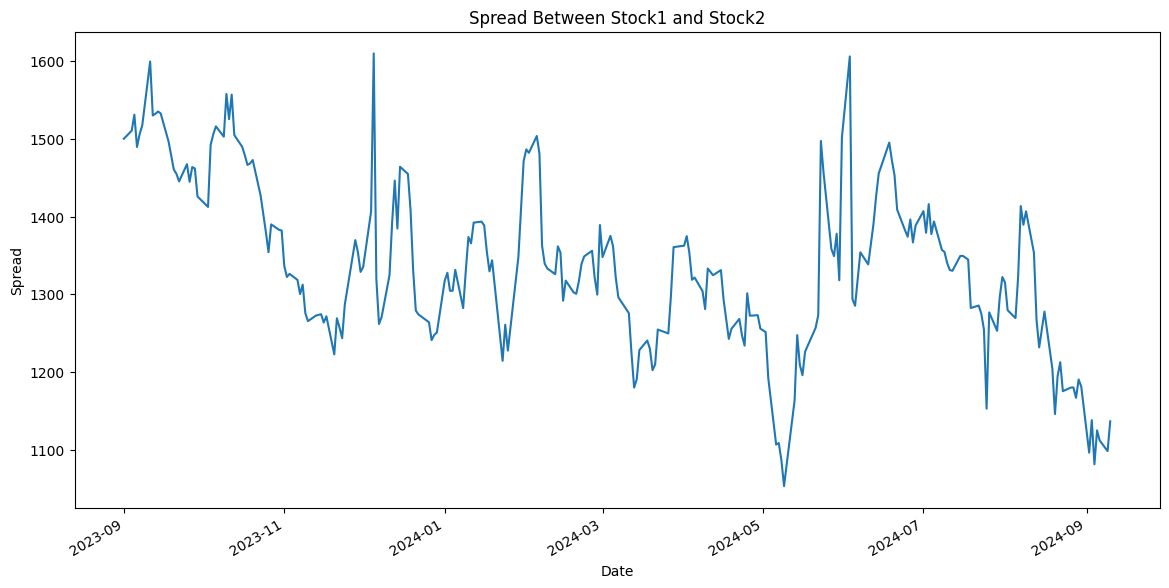

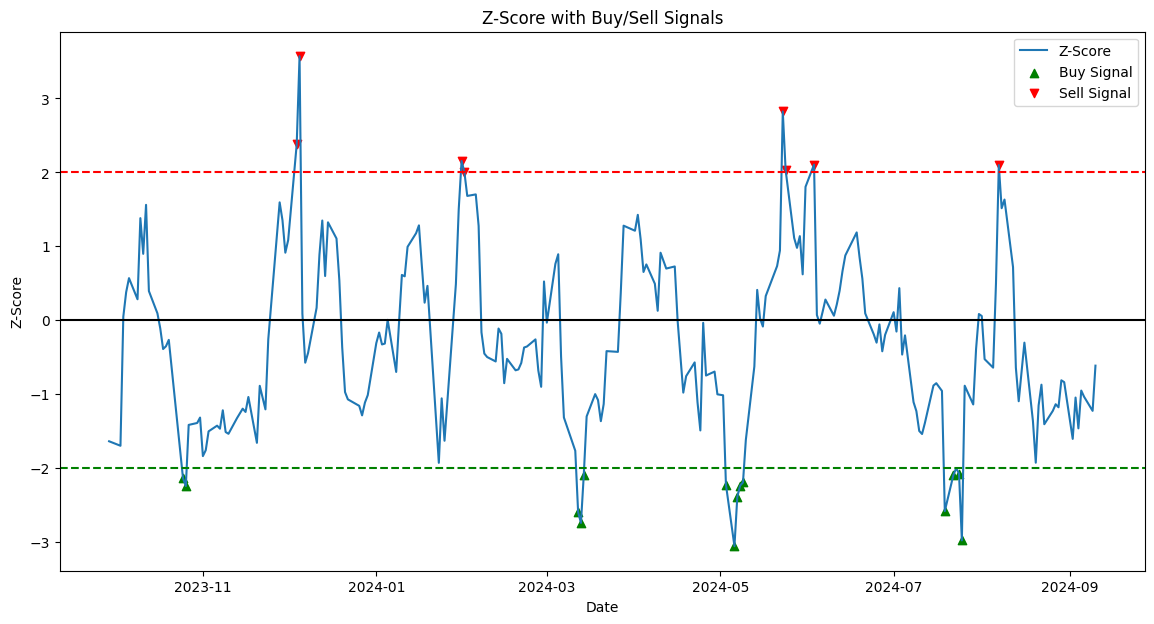

Entering long at 2023-10-25 00:00:00, spread: 1379.9400634765625
Exiting Long position at 2023-11-24 00:00:00, PnL: -93.287109375
Entering short at 2023-12-04 00:00:00, spread: 1406.4296875
Exiting Short position at 2023-12-06 00:00:00, PnL: 87.09228515625
Entering short at 2024-01-31 00:00:00, spread: 1471.283447265625
Exiting Short position at 2024-02-07 00:00:00, PnL: 108.7353515625
Entering long at 2024-03-12 00:00:00, spread: 1224.1412353515625
Exiting Long position at 2024-03-22 00:00:00, PnL: 30.5560302734375
Entering long at 2024-05-03 00:00:00, spread: 1192.243408203125
Exiting Long position at 2024-05-14 00:00:00, PnL: 55.2822265625
Entering short at 2024-05-23 00:00:00, spread: 1497.134521484375
Exiting Short position at 2024-06-04 00:00:00, PnL: 203.070068359375
Entering long at 2024-07-19 00:00:00, spread: 1282.39990234375
Exiting Long position at 2024-07-30 00:00:00, PnL: 13.9500732421875
Entering short at 2024-08-07 00:00:00, spread: 1413.449951171875
Exiting Short posit

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

# 1. Download Historical Data
stock1 ='ADANIENT.NS'     # Coca-Cola
stock2 ='ADANIGREEN.NS' # Pepsi

start_date = '2023-09-01'
end_date = '2024-09-11'

data1 = yf.download(stock1, start=start_date, end=end_date)
data2 = yf.download(stock2, start=start_date, end=end_date)

# Use the 'Adj Close' prices
data = pd.DataFrame({'Stock1': data1['Adj Close'], 'Stock2': data2['Adj Close']})
data.dropna(inplace=True)

# 2. Cointegration Test
score, p_value, _ = coint(data['Stock1'], data['Stock2'])
print(f'Cointegration test p-value: {p_value}')
if p_value < 0.05:
    print("The pair is cointegrated.")
else:
    print("The pair is not cointegrated.")

# 3. Calculate the Spread
spread = data['Stock1'] - data['Stock2']
data['Spread'] = spread

# Plot the spread
plt.figure(figsize=(14, 7))
data['Spread'].plot(title='Spread Between Stock1 and Stock2')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()

# 4. Generate Trading Signals
window = 20  # Lookback period for mean and std deviation
data['Spread_Mean'] = data['Spread'].rolling(window=window).mean()
data['Spread_Std'] = data['Spread'].rolling(window=window).std()

# Define Z-Score
data['Z_Score'] = (data['Spread'] - data['Spread_Mean']) / data['Spread_Std']

# Define trading signals
data['Long_Entry'] = data['Z_Score'] < -2
data['Short_Entry'] = data['Z_Score'] > 2
data['Exit'] = (data['Z_Score'] > -0.5) & (data['Z_Score'] < 0.5)

# Plot Z-score with buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z_Score'], label='Z-Score')
plt.axhline(2, color='r', linestyle='--')
plt.axhline(-2, color='g', linestyle='--')
plt.axhline(0, color='black', linestyle='-')
plt.scatter(data.index[data['Long_Entry']], data['Z_Score'][data['Long_Entry']], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(data.index[data['Short_Entry']], data['Z_Score'][data['Short_Entry']], color='red', label='Sell Signal', marker='v', alpha=1)
plt.legend(loc='best')
plt.title('Z-Score with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.show()

# 5. Simulate the Trading Strategy
# Initialize position and P&L
position = 0  # 1 = long, -1 = short
entry_price = 0
pnl = []
trades = []  # To store trade details

for i in range(1, len(data)):
    # Access the i-th row using .iloc
    long_entry = data['Long_Entry'].iloc[i]
    short_entry = data['Short_Entry'].iloc[i]
    exit_signal = data['Exit'].iloc[i]
    current_spread = data['Spread'].iloc[i]
    current_date = data.index[i]

    if long_entry and position == 0:
        # Long entry: Long Stock1, Short Stock2
        position = 1
        entry_price = current_spread
        trades.append({'Entry_Date': current_date, 'Position': 'Long', 'Entry_Price': entry_price})
        print(f"Entering long at {current_date}, spread: {entry_price}")

    elif short_entry and position == 0:
        # Short entry: Short Stock1, Long Stock2
        position = -1
        entry_price = current_spread
        trades.append({'Entry_Date': current_date, 'Position': 'Short', 'Entry_Price': entry_price})
        print(f"Entering short at {current_date}, spread: {entry_price}")

    elif exit_signal and position != 0:
        # Exit position
        if position == 1:
            pnl_trade = current_spread - entry_price  # Profit from long position
            position_type = 'Long'
        elif position == -1:
            pnl_trade = entry_price - current_spread  # Profit from short position
            position_type = 'Short'

        pnl.append(pnl_trade)
        exit_date = current_date
        trades[-1].update({'Exit_Date': exit_date, 'Exit_Price': current_spread, 'PnL': pnl_trade})
        print(f"Exiting {position_type} position at {exit_date}, PnL: {pnl_trade}")
        position = 0  # Reset position

# Calculate total P&L
total_pnl = sum(pnl)
print(f'Total PnL: {total_pnl}')

# Optional: Create a DataFrame of trades for analysis
trades_df = pd.DataFrame(trades)
print(trades_df)


[*********************100%***********************]  1 of 1 completed


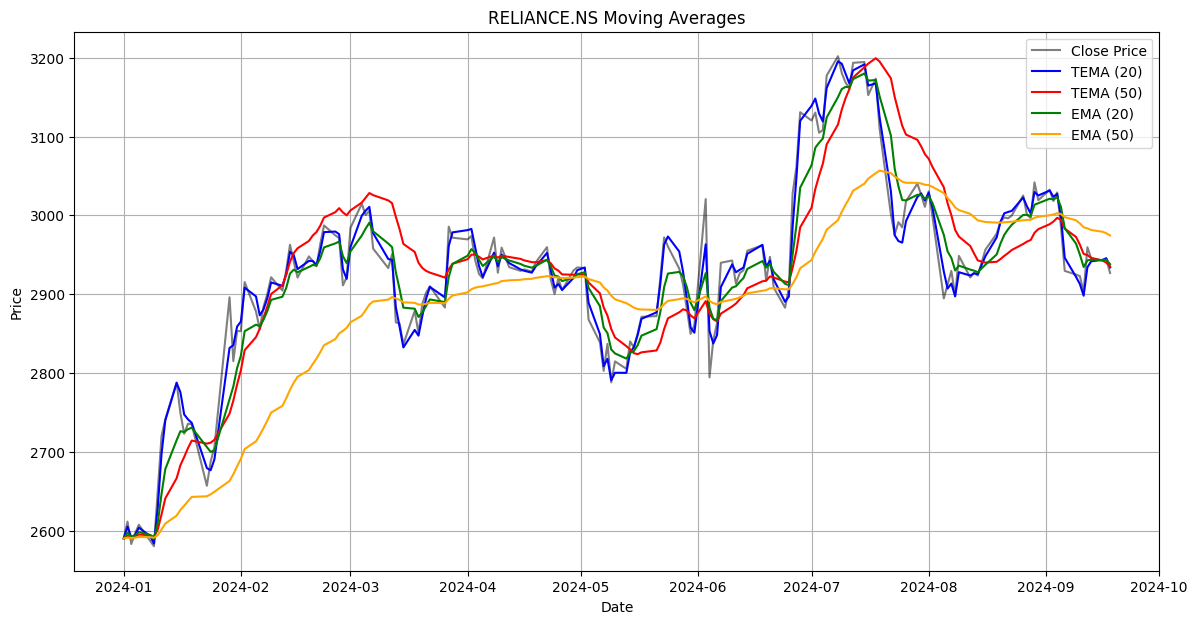

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate the Exponential Moving Average (EMA)
def EMA(data, period):
    return data.ewm(span=period, adjust=False).mean()

# Function to calculate the Triple Exponential Moving Average (TEMA)
def TEMA(data, period):
    ema1 = EMA(data, period)            # First EMA
    ema2 = EMA(ema1, period)            # EMA of the first EMA
    ema3 = EMA(ema2, period)            # EMA of the second EMA
    tema = (3 * ema1) - (3 * ema2) + ema3  # TEMA formula
    return tema

# Function to fetch historical data and calculate TEMA and EMA
def fetch_data_and_calculate_moving_averages(ticker, start_date, end_date):
    # Fetch historical data from yfinance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate TEMA and EMA
    data['TEMA_20'] = TEMA(data['Close'], 5)
    data['TEMA_50'] = TEMA(data['Close'], 35)
    data['EMA_20'] = EMA(data['Close'], 5)
    data['EMA_50'] = EMA(data['Close'], 35)

    return data[['Close', 'TEMA_20', 'TEMA_50', 'EMA_20', 'EMA_50']]

# Function to plot the results
def plot_moving_averages(data, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='black', alpha=0.5)
    plt.plot(data['TEMA_20'], label='TEMA (20)', color='blue')
    plt.plot(data['TEMA_50'], label='TEMA (50)', color='red')
    plt.plot(data['EMA_20'], label='EMA (20)', color='green')
    plt.plot(data['EMA_50'], label='EMA (50)', color='orange')

    plt.title(f'{ticker} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
ticker = 'RELIANCE.NS'  # Example ticker symbol for Apple Inc.
start_date = '2024-01-01'  # Start date for historical data
end_date = '2024-09-19'    # End date for historical data

# Fetch data and calculate moving averages
result = fetch_data_and_calculate_moving_averages(ticker, start_date, end_date)

# Plot the results
plot_moving_averages(result, ticker)
